<a href="https://colab.research.google.com/github/SakshamRimal/Deep-Learning/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [17]:
# Load MNIST dataset
(X_train , y_train), (X_test , y_test) = keras.datasets.mnist.load_data()

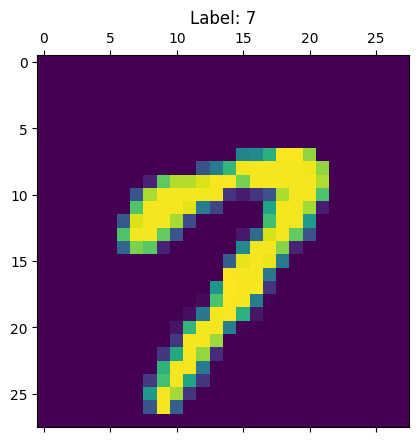

In [18]:

# Visualize a sample digit
plt.matshow(X_train[15])
plt.title(f"Label: {y_train[15]}")
plt.show()

In [19]:
# Preprocessing: Flatten and normalize
X_train_flattend = X_train.reshape(len(X_train), 28*28) / 255.0
X_test_flattend = X_test.reshape(len(X_test), 28*28) / 255.0

In [20]:
# Build the model
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])

In [21]:

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
# Train the model
model.fit(X_train_flattend, y_train, epochs=5, validation_data=(X_test_flattend, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8228 - loss: 0.7039 - val_accuracy: 0.9151 - val_loss: 0.3059
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9158 - loss: 0.3053 - val_accuracy: 0.9216 - val_loss: 0.2803
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9211 - loss: 0.2859 - val_accuracy: 0.9227 - val_loss: 0.2780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9244 - loss: 0.2687 - val_accuracy: 0.9244 - val_loss: 0.2685
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9262 - loss: 0.2617 - val_accuracy: 0.9253 - val_loss: 0.2708


In [23]:
# Predictions
y_predicted = model.predict(X_test_flattend)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
# Accuracy on test set
test_loss, test_acc = model.evaluate(X_test_flattend, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9158 - loss: 0.3061

Test accuracy: 0.9253


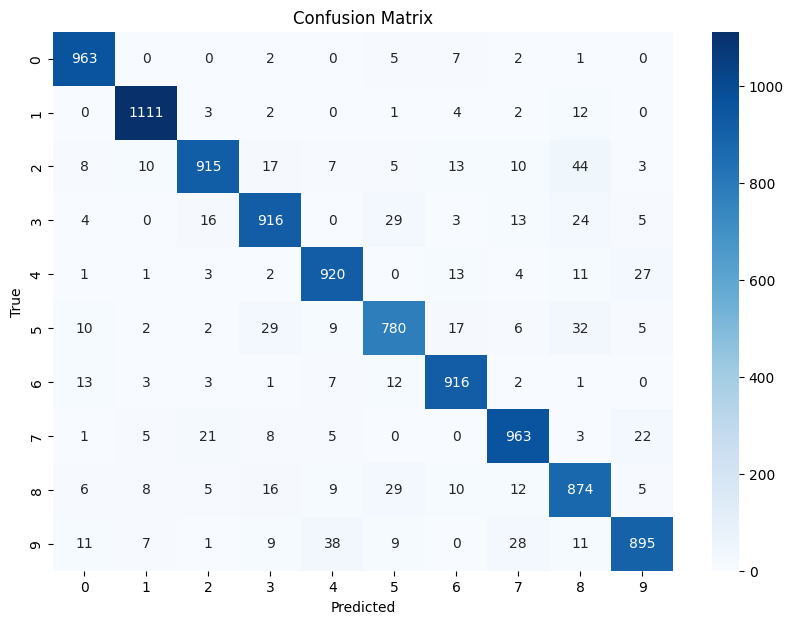

In [25]:

# Confusion matrix
cm = confusion_matrix(y_test, y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_predicted_labels))


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.90      0.87      0.89       892
           6       0.93      0.96      0.94       958
           7       0.92      0.94      0.93      1028
           8       0.86      0.90      0.88       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



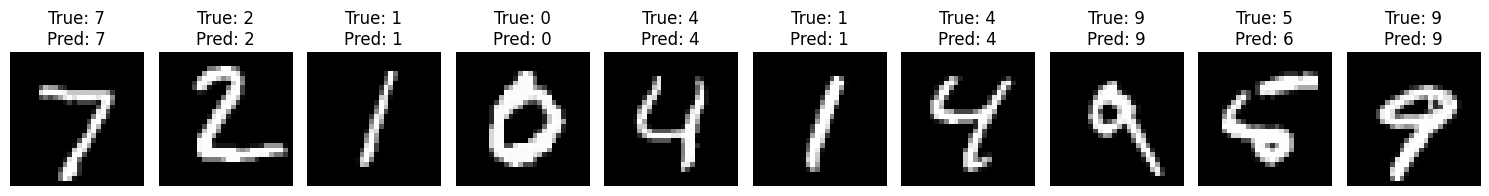

In [29]:
# Visualize some predictions
def plot_sample_predictions(images, true_labels, predicted_labels, count=10):
    plt.figure(figsize=(15, 5))
    for i in range(count):
        plt.subplot(1, count, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_predictions(X_test, y_test, y_predicted_labels)
